# Defining Relevant Sessions and Folders

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from open_ephys.analysis import Session

## Creating a MEP class

In [48]:
class MEP:
    def __int__(self, data, channels, events):
        self.data = data
        self.emp = emp

# Importing and Formatting Master Spreadsheet

In [6]:
master_folder = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test'
file_one = 'MICE_LIST_EEG.xlsx'

all_session_data = pd.read_excel(file_one, sheet_name='MEP2024')

# sorting data by date

all_session_data['session'] = pd.to_datetime(all_session_data['session'], format='%Y-%m-%d_%H-%M-%S')
all_session_data = all_session_data.sort_values(by = 'session')

cut_off_date = pd.to_datetime('2024-03-02_00-00-00', format = '%Y-%m-%d_%H-%M-%S')

march_session_data = all_session_data[all_session_data['session'] > cut_off_date]

# filtering sessions by sessionType

def sort_by_type(data, type, session_class):
    return data[(march_session_data['sessionType'].str.contains(type)) & (march_session_data['sessionClass'].str.contains(session_class))].reset_index()
    
mep_sciatic = sort_by_type(march_session_data, 'sciatic', 'MEP')
mep_skull = sort_by_type(march_session_data, 'skull', 'MEP')
mep_spine = sort_by_type(march_session_data, 'spine', 'MEP')

mep_sciatic['session_dates'] = mep_sciatic['session'].dt.strftime('%Y-%m-%d_%H-%M-%S')


mep_sciatic['subrec'] = mep_sciatic['subrec'].astype(int)

mep_sciatic

,index,session,animalID,cage,ear,phenotype,phenoCode,subrec,sessionClass,sessionType,currentLevel,isoflo,stim,trials_from,trials_to,notes,session_dates
0,37,2024-03-02 11:08:17,A565,NaN,NaN,5XFAD,2.0,1,MEP,sciatic,1.68,1.60,NaN,1.0,60.0,1 pulse 100us,2024-03-02_11-08-17
1,42,2024-03-02 12:39:39,A580,NaN,NaN,5XFAD,2.0,1,MEP,sciatic,1.20,1.75,NaN,NaN,NaN,21pulses 100us pol black,2024-03-02_12-39-39
2,50,2024-03-02 14:50:32,A563,NaN,NaN,WT,1.0,1,MEP,sciatic,1.05,1.75,NaN,NaN,NaN,50us pulse,2024-03-02_14-50-32
3,51,2024-03-02 15:25:14,A579,NaN,NaN,WT,1.0,1,MEP,sciatic,0.65,NaN,NaN,NaN,NaN,ref on base of tail .65mA 100us single pulse,2024-03-02_15-25-14
4,58,2024-03-02 17:19:10,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,3.00,1.75,NaN,NaN,NaN,100us pulse single iso=1.75% ref on tail,2024-03-02_17-19-10
5,60,2024-03-02 17:25:14,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.00,1.50,NaN,NaN,NaN,"50us pulse single, ref on tailbase",2024-03-02_17-25-14
6,61,2024-03-02 17:33:46,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,1.75,NaN,NaN,NaN,"50us pulse single, ref on tailbase",2024-03-02_17-33-46
7,62,2024-03-02 17:36:12,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,1.75,NaN,NaN,NaN,50us pulse single ref on tailbase,2024-03-02_17-36-12
8,63,2024-03-02 17:39:35,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,2.00,NaN,NaN,NaN,200us pulse double iso=2% ref on tailbase,2024-03-02_17-39-35
9,64,2024-03-02 17:48:55,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.00,2.00,NaN,NaN,NaN,"200us pulse double, ref on tailbase across ears",2024-03-02_17-48-55


# importing a single session's data

In [50]:
file = mep_sciatic.session_dates[0]
file_path = os.path.join(master_folder, file)
file_size = os.path.getsize(file_path)
sample = 'Record Node 103/experiment1/recording1/continuous/OE_FPGA_Acquisition_Board-100.Rhythm Data/sample_numbers.npy'
sample_path = os.path.join(master_folder, file, sample)

# finding the total number of samples in data
sample_numbers = np.load(sample_path)
data_length = sample_numbers.max() - sample_numbers.min()

# loading and checking session data
session = Session(file_path)
recording = session.recordnodes[0].recordings[0]

# session_data = recording.continuous[0].get_samples(start_sample_index=0, end_sample_index=data_length)
# session_data

# plot to check data
# plt.figure(figsize=(21,7))
# plt.plot(session_data)

# extracting relevant channels

In [51]:
channel_names = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16}

# fig1, axs1 = plt.subplots(16, 1, figsize=(21, 28))

count = 0
all_channels = {}

for i in range(0,16):
    # storing each sample as an individual array
    channel_data_raw = recording.continuous[0].get_samples(start_sample_index=0, end_sample_index=data_length, selected_channels=[i])
    channel_data_array = np.array([arr[0] for arr in channel_data_raw])
    all_channels[channel_names[i]] = channel_data_array
    
#     plotting all the data
#     time_axis = [t for t in range(len(channel_data_array))]
#     axs1[i].plot(time_axis, channel_data_array, color = 'purple')
#     axs1[i].set_title(channel_names[i])
#     axs1[i].set_xlabel('Time (seconds)')
#     axs1[i].set_ylabel('Amplitude')
#     plt.tight_layout()
    count+=1
    
all_channels

{1: array([-116.02499574, -108.41999602, -108.41999602, ...,   83.65499693,
          72.92999732,   82.87499696]),
 2: array([-174.13499361, -179.20499343, -187.78499311, ...,  167.50499386,
         158.92499417,  159.89999413]),
 3: array([-55.76999795, -55.37999797, -57.52499789, ...,  13.25999951,
         -3.50999987,  14.62499946]),
 4: array([-60.0599978 , -65.90999758, -71.95499736, ...,  16.57499939,
          1.55999994,  16.3799994 ]),
 5: array([  9.55499965,   4.48499984,  -5.65499979, ...,  29.24999893,
        -44.84999835,  30.0299989 ]),
 6: array([-0.97499996,  2.7299999 , -3.50999987, ...,  3.11999989,
        -7.79999971,  3.70499986]),
 7: array([  2.7299999 ,  -1.55999994,  -3.31499988, ...,  35.87999868,
        -39.97499853,  22.42499918]),
 8: array([ 0.97499996,  1.16999996, -3.11999989, ...,  7.99499971,
        -9.55499965,  2.33999991]),
 9: array([0.48231041, 0.48231041, 0.48231041, ..., 0.48246001, 0.48246001,
        0.48283401]),
 10: array([0.80185602

## event extraction function

In [52]:
def extract_events(channel, threshold):
    # validate inputs: ensure channel is a list and threshold is numeric
    if not isinstance(channel, list) or not isinstance(threshold, (int, float)):
        raise ValueError("Invalid input: 'channel' must be a list and 'threshold' must be a numeric value.")

    if not channel:  # check if the channel is empty
        return print('channel is empty')

    events = {}  # initialize as dictionary to store events with unique identifiers
    event_names = 1  # start naming events from 1
    is_event = False
    event_start = None

    for sample, value in enumerate(channel): 
        if value >= threshold:
            if not is_event:
                event_start = sample  # record the start of a new event
                is_event = True
        else:
            if is_event:
                events[event_names] = (event_start, sample - 1)  # store the event
                event_names += 1  # increment event name for the next event
                is_event = False

    # check if an event is ongoing at the end of the channel
    if is_event:
        events[event_names] = (event_start, len(channel) - 1)  # handle the final ongoing event

    return events

In [53]:
# event channels were initially stored as np.arrays, extract event function utilises lists for generality so here we convert the array into a list and extract events

event_channel = [i for i in all_channels[13]]
threshold = 0.5

extracted = extract_events(event_channel, threshold)

extracted 

{1: (2235039, 2235043),
 2: (2250051, 2250055),
 3: (2265063, 2265068),
 4: (2280075, 2280080),
 5: (2295088, 2295092),
 6: (2310100, 2310104),
 7: (2325112, 2325116),
 8: (2340124, 2340129),
 9: (2355137, 2355141),
 10: (2370150, 2370154),
 11: (2385164, 2385168),
 12: (2400177, 2400182),
 13: (2415191, 2415195),
 14: (2430204, 2430209),
 15: (2445218, 2445222),
 16: (2460231, 2460235),
 17: (2475245, 2475249),
 18: (2490258, 2490263),
 19: (2505272, 2505276),
 20: (2520285, 2520290),
 21: (2535299, 2535303),
 22: (2550312, 2550317),
 23: (2565326, 2565330),
 24: (2580339, 2580344),
 25: (2595353, 2595357),
 26: (2610366, 2610371),
 27: (2625380, 2625384),
 28: (2640393, 2640398),
 29: (2655407, 2655411),
 30: (2670420, 2670425),
 31: (2685434, 2685438),
 32: (2700447, 2700452),
 33: (2715461, 2715465),
 34: (2730475, 2730479),
 35: (2745488, 2745492),
 36: (2760501, 2760506),
 37: (2775515, 2775519),
 38: (2790529, 2790533),
 39: (2805542, 2805546),
 40: (2820556, 2820560),
 41: (283

## generating EMP

In [54]:
# function to convert ms durations to sample numbers

def seconds_to_samples(frequency, duration):
    duration_in_seconds = duration*(10**(-3))
    samples = frequency * duration_in_seconds
    return samples

sampling_rate = 30000 # 30,000 Hz
pre_stimulus_ms = 100 # 100 ms
post_stimulus_ms = 500 # 500 ms

# conversion to samples

pre_stimulus = int(seconds_to_samples(sampling_rate, pre_stimulus_ms))
post_stimulus = int(seconds_to_samples(sampling_rate, post_stimulus_ms))

pre_stimulus,post_stimulus



(3000, 15000)

In [55]:
# generates a list of event data in desired temporal region (event related activity)


def get_event_data(extracted_events):
    data = []

    for channel in range(1,17):
        extracted_data = []
        for event_number, (start, end) in extracted_events.items():
            start_actual = int(start - pre_stimulus)
            end_actual = int(start + 10000)
            event_data = all_channels[channel][start_actual:end_actual]
            extracted_data.append(event_data)
        
        data.append(np.vstack(extracted_data).T)

    return np.array(data)

all_event_data = get_event_data(extracted)

averaged_data = np.mean(all_event_data, axis = 2).T

averaged_data



array([[-17.78724935, -35.02524872,  -7.41324973, ...,   0.0646642 ,
          0.05715434,   4.59030151],
       [-18.74599931, -35.98399868,  -9.07399967, ...,   0.06475067,
          0.05718994,   4.59030151],
       [-15.29449944, -32.7957488 ,  -4.38424984, ...,   0.06482442,
          0.05729421,   4.59030151],
       ...,
       [-12.71399953, -28.99649894,   1.87849993, ...,   0.0647049 ,
          0.05717723,   4.59030151],
       [-14.89799945, -31.08949886,  -1.20899996, ...,   0.06470998,
          0.05716705,   4.59030151],
       [-16.3767494 , -31.83049883,  -3.31499988, ...,   0.06471507,
          0.05718994,   4.59030151]])

## Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


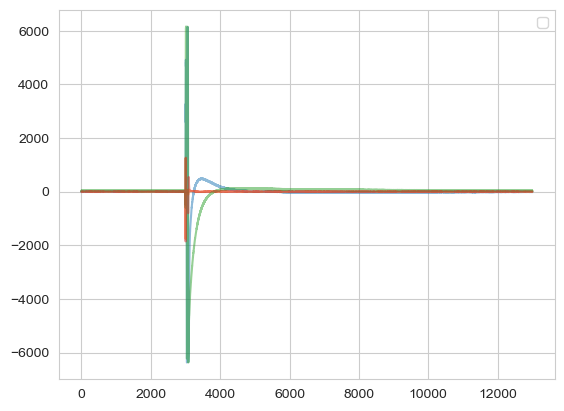

In [46]:
fig = plt.figure(figsize = (21,7))
for i in range(4,8):
    plt.plot(averaged_data[:,i], alpha = 0.5)
    

